## Analysis of [Bad teeth dataset](https://www.kaggle.com/angelmm/healthteethsugar)

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, clear_output

import matplotlib.pyplot as plt
%matplotlib inline

The data is badly structured and organized. Many columns are completely empty, also the headers are strange. Try to improvce it a little bit while reading

In [2]:
df_a = pd.read_csv('input/adultliteracy.csv', names=[str(i) for i in xrange(1975, 2012)], skiprows=1)
df_b = pd.read_csv('input/badteeth.csv', skiprows=1, usecols=[0, 1], names=['country', '2004_teeth'], skipfooter=1, engine='python').set_index('country')
df_g = pd.read_csv('input/gdp.csv', names=[str(i) for i in xrange(1960, 2012)], skiprows=1).dropna(how='all')
df_h = pd.read_csv('input/healthexpend.csv', names=[str(i) for i in xrange(1995, 2011)], skiprows=1).dropna(how='all')
df_s = pd.read_csv('input/sugar_consumption.csv', names=[str(i) for i in xrange(1961, 2006)], skiprows=1).drop('2005', axis=1).dropna(how='all')

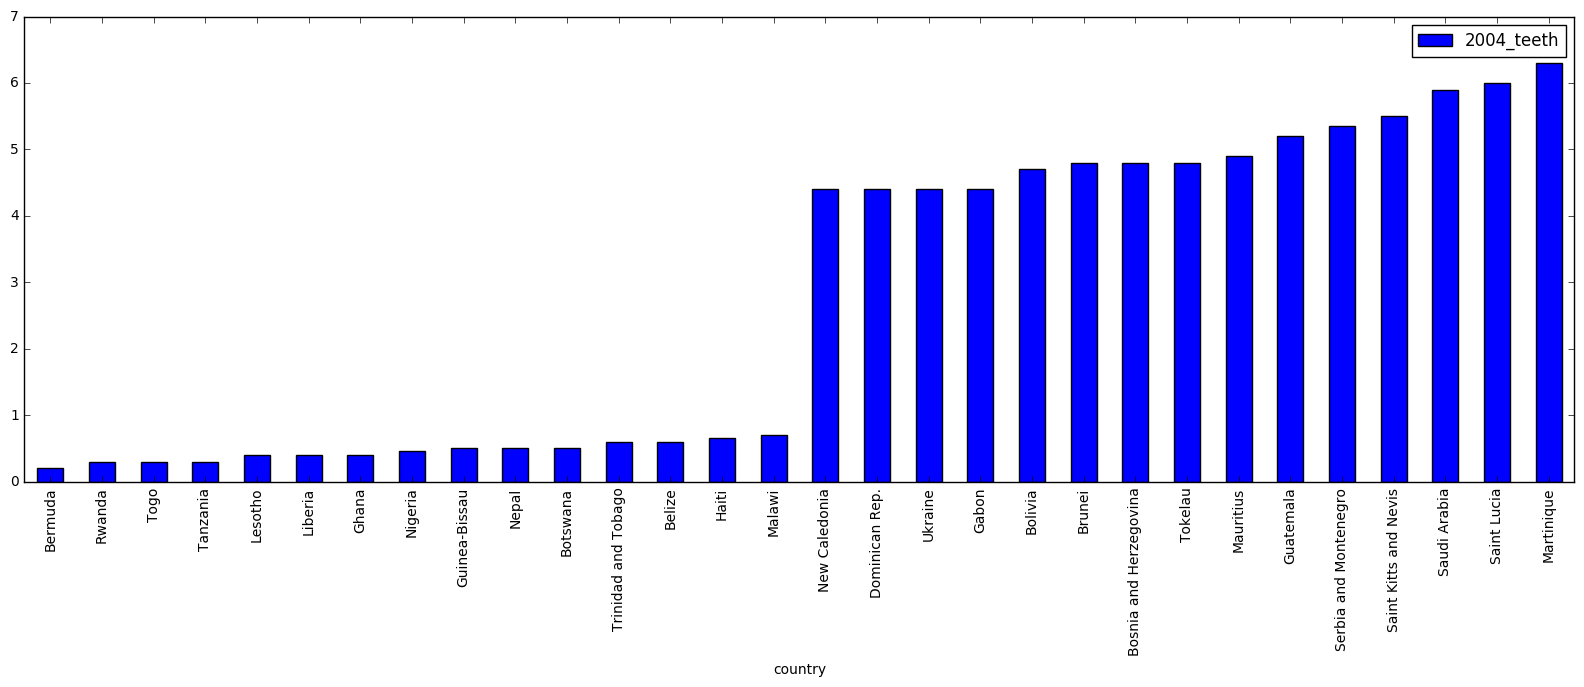

In [3]:
tmp, num = df_b.sort_values('2004_teeth'), 15
pd.concat([tmp.head(num), tmp.tail(num)]).plot.bar(figsize=(20, 6));

There are too many countries to plot them properly, so I just decided to take a look at the best/worse 15 countries. The data tells that Rwanda, Lesotho, Botswana, Ghana has better 'teeth' health than literally every advanced country in the world. I highly doubt this is true.

I believe the way data was collected in a way that only people who actually came to a dentist were included. Most probably poor population in these countries can't afford a visit to a doctor, so only the data about wealthy and potentially healthy people were recorded.

**Adult literacy data** is also of very low quality. You can't find any country that has all data avaiable for all the years from 2000 till 2011. I highly doubt that non of the countries have such data availble and most probably such data was collected starting from 1980 in US and many european countries. 

To somehow plot the data, I am going to grab the average data available in some region of time. After that I will just get rid of the data where at least one column is empty and will plot it. The problem is that there are too many countries, so I will group them based on very literate and very illiterate (ignoring a bunch of data in between).

In [4]:
ranges = [('198x', 1975, 1985), ('199x', 1985, 1995), ('200x', 1995, 2005), ('201x', 2005, 2012)]
for name, start, end in ranges:
    df_a[name] = df_a[[str(i) for i in range(start, end)]].mean(axis=1)
    
tmp = df_a[['198x', '199x', '200x', '201x']].dropna(how='any')

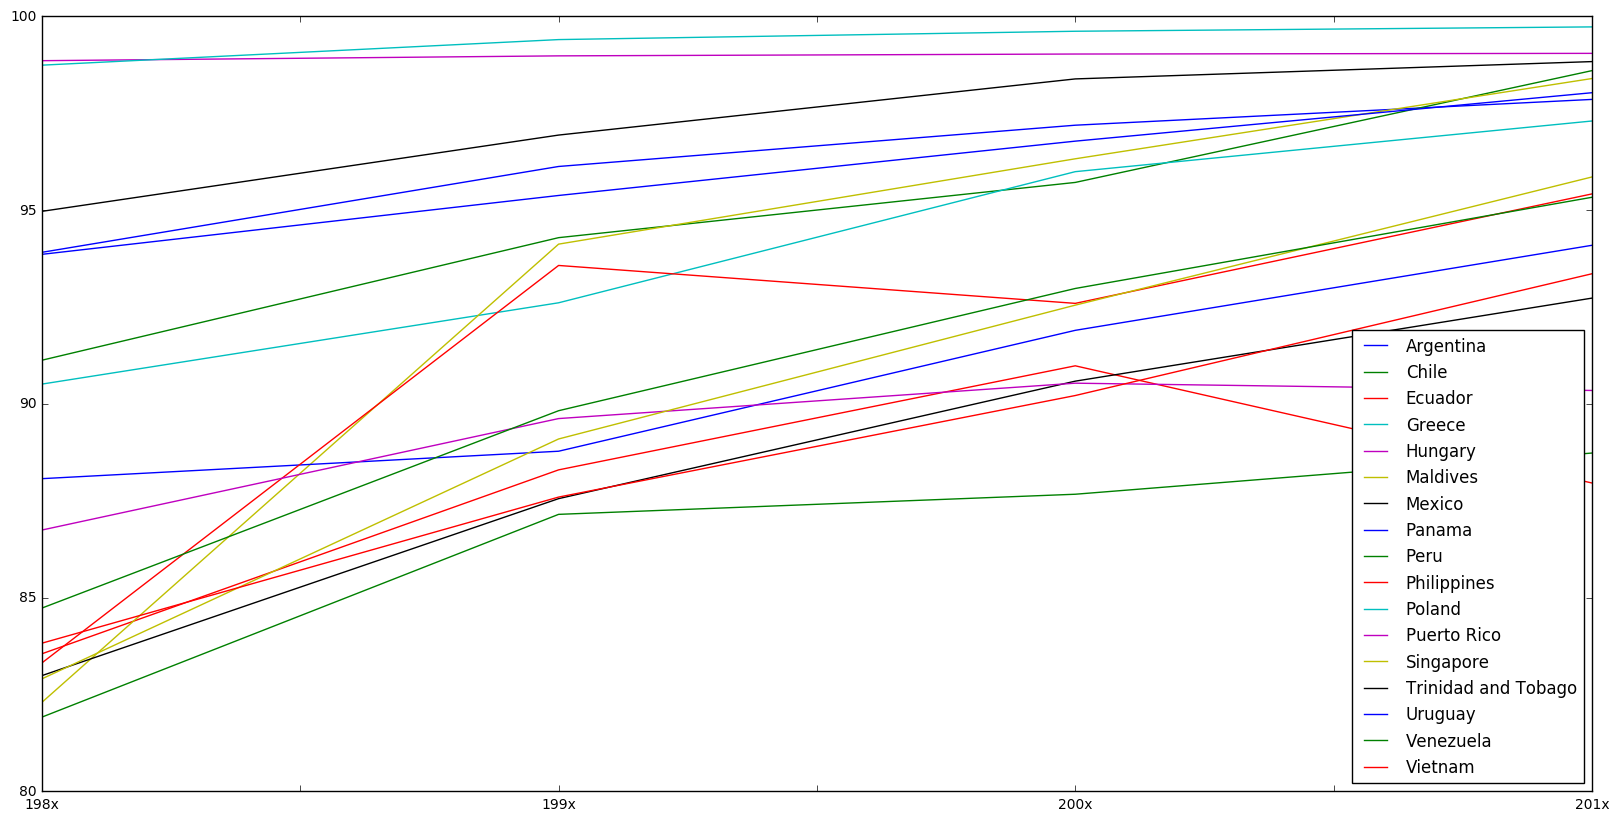

In [5]:
tmp[tmp['198x'] > 80].T.plot(figsize=(20, 10));

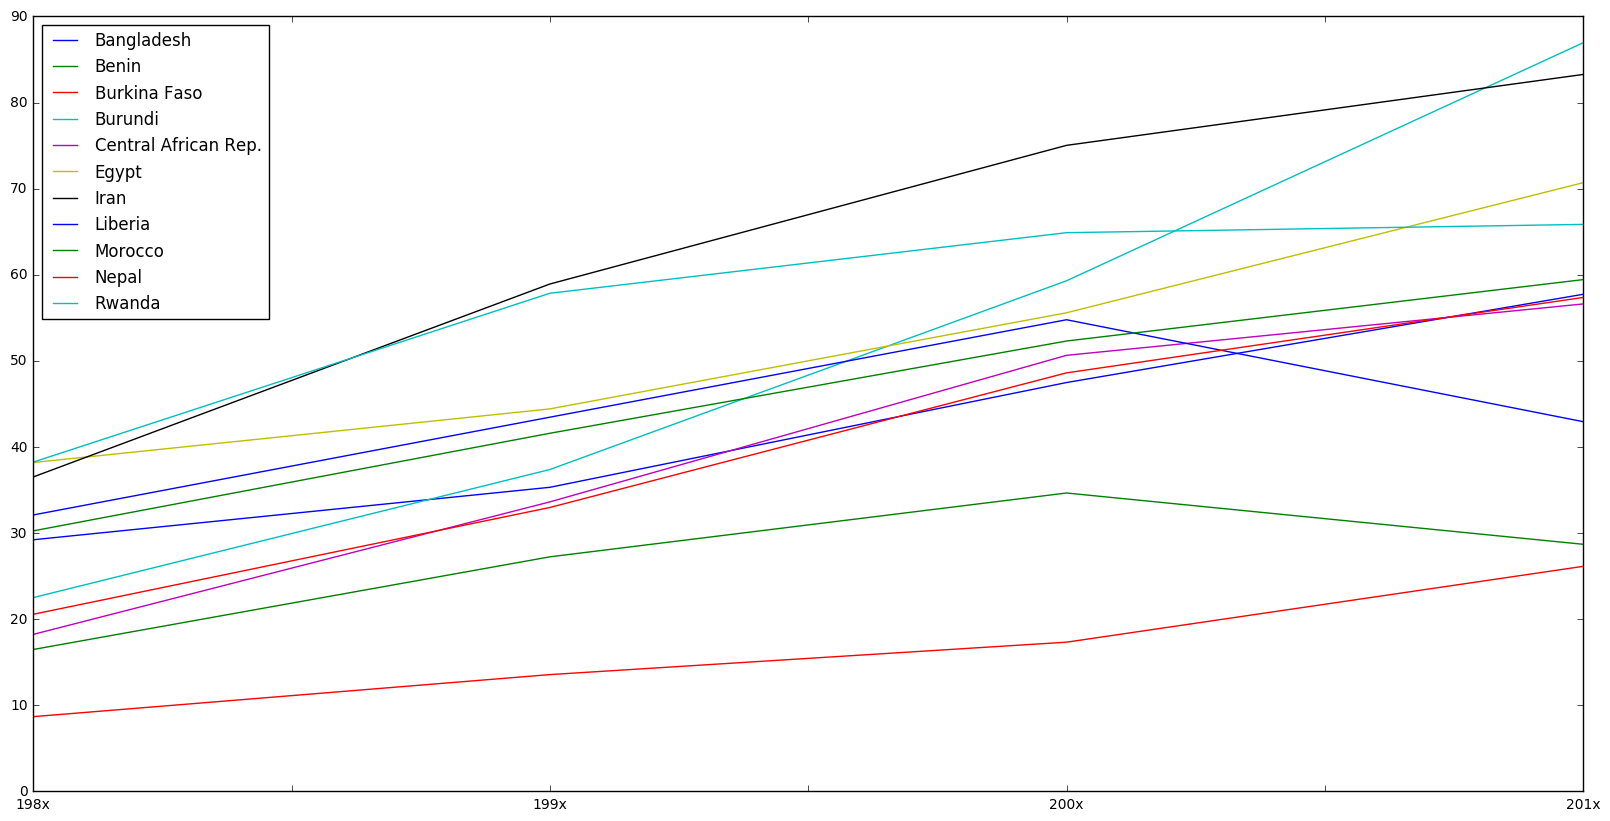

In [6]:
tmp[tmp['198x'] < 40].T.plot(figsize=(20, 10));

Was surprised to see that Vietnam and Phillipines were doing great from the 80th. Also congrats to Bangladesh which made a huge jump from 20% to almost 90% from 80th.

The same plots can be generated for all other dataframes, but it is not really that interesting.